<a href="https://colab.research.google.com/github/Meidyt/TugasClustering/blob/main/TugasClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLUSTERING**
Merupakan salah satu dari unsupervised learning, dimana data yang ada nantinya akan dikelompokkan oleh komputer tanpa melalui pelatihan data terlebih dahulu. Lalu apakah yang membedakan clustering (klastirifikasi) dengan Classification (Klasifikasi)? Bukankah klasifikasi juga mengelompokkan? 
Ya, klasifikasi dan klastirifikasi sama-sama mengelompokkan, namun yang membedakan keduanya adalah ada tidaknya label. Pada klasifikasi, data yang dikelompokkan langsung masuk ke label yang sudah ditentukan, sedangkan pada clustering (klasterifikasi) ini, data hanya dikelompokkan berdasarkan data "terdekat". Terdapat beberapa metode dalam clustering, pada tugas kali ini saya menggunakan K-Means Clustering 



---



# **K-Means Clustering**

### Import Libraries


Seperti biasa, kita mengawali semuanya dengan melakukan import tiap library yang akan digunakan. 

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

### Import Raw Dataset

Raw data set yang digunakan pada kali ini diambil dari Kaggle dan telah terupload di repository saya. 

In [133]:
df_mall = pd.read_csv('https://raw.githubusercontent.com/Meidyt/TugasClustering/main/Mall_Customers.csv')
df_mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Setelah mengimport data set, selanjutnya adalah menampilkan informasi terkait data set, sehingga kita bisa tahu apakah data set yang akan digunakan terdapat missing data atau tidak. 

In [134]:
# Prints the Dataset Information
df_mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Selanjutnya adalah untuk menampilkan beberapa informasi terkait data frame yang mencakup banyak data, mean, standar deviasi, kuartil, nilai min dan max

In [135]:
# Prints Descriptive Statistics
df_mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Data Prepocessing

Setelah selesai dengan import data set, selanjutnya adalah melakukan prepocessing data. Untuk hal pertama yang dilakukan adalah mengubah bentuk data "gender" yang sebelumnya dari objek menjadi nominal. 

In [136]:
df_mall['Gender'] = df_mall['Gender'].map({
    "Male" : 1,
    "Female" : 0
})

Lalu, selanjutnya dilakukan scaling data.

In [138]:
# Importing Standardscalar Module 
from sklearn.preprocessing import StandardScaler 

# Set Name for StandardScaler as scaler
scaler = StandardScaler() 

# Fit Standardization
column_names = df_mall.columns.tolist()
df_mall[column_names] = scaler.fit_transform(df_mall[column_names])
df_mall.sort_index(inplace=True)
df_mall
df_mall.columns = [c.replace(' ', '_') for c in df_mall.columns]
df_mall = df_mall[['Annual_Income_(k$)','Spending_Score_(1-100)']].copy()

### Data Visualization

Setelah melakukan preprocessing, dilakukan visualisasi data dengan scatter-plot, untuk melihat pesebaran data yang ada. 

Text(0, 0.5, 'Annual Spend')

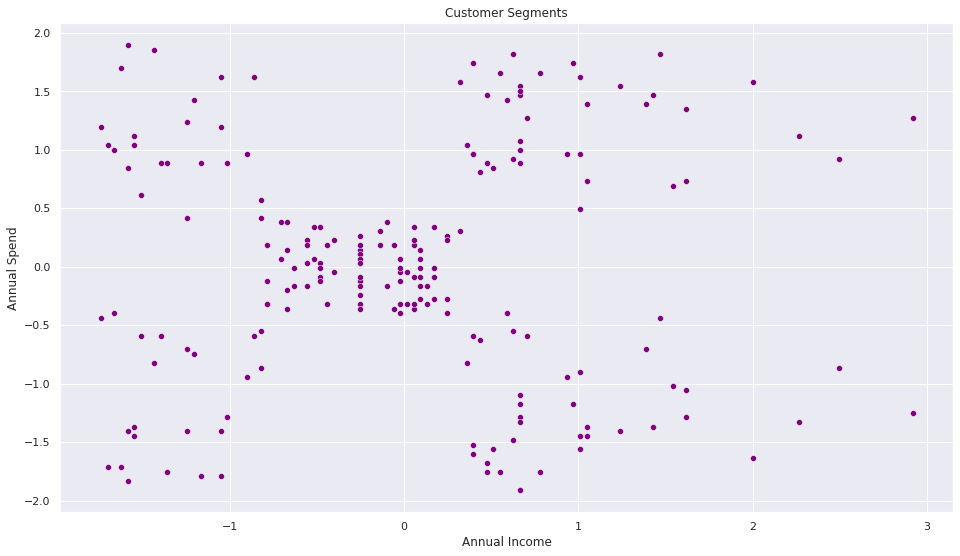

In [139]:
# Styling Plot
sns.set() 
plt.rcParams['figure.figsize'] = (16, 9)

# Visualizing the Data
sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score_(1-100)', data=df_mall, color="purple")
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Annual Spend')

### Search for the Optimum Number of Clusters (K)

Untuk metode ini, kita harus menentukan berapa klaster (K) yang akan digunakan. Untuk menentukannya, ada 2 cara yang digunakan. yang pertama adalah Elbow method, dan silhoutte method.

**Elbow Method**

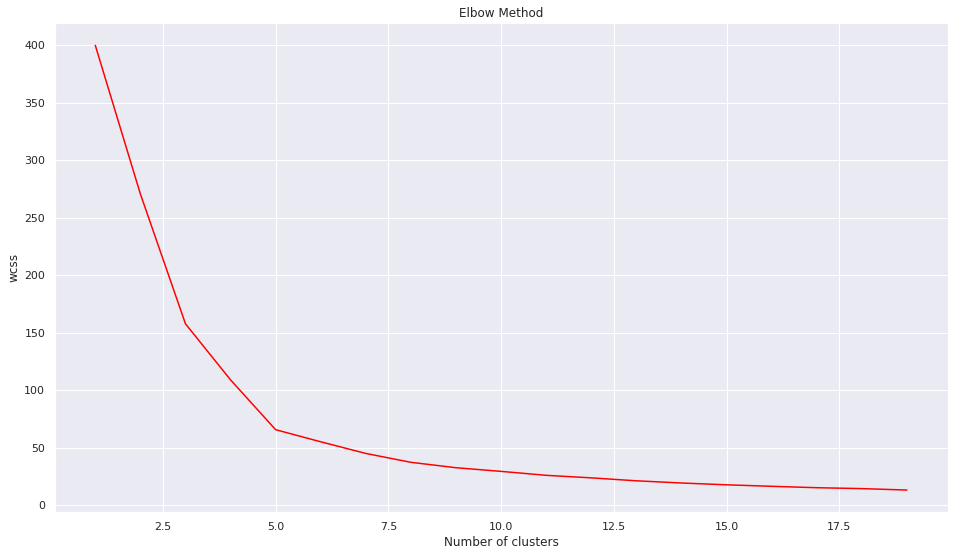

In [140]:
# Transform Data Frame to Numpy Array
income = df_mall.to_numpy()
income

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(income)
    wcss.append(kmeans.inertia_)
  
# Visualize 
plt.plot(range(1,20),wcss, color="red")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')

plt.show()

Pada grafik hasil menggunakan metode elbow method, dapat dilihat jika "siku" grafik berada pada angka 5, sehingga klaster yang nantinya akan dipilih adalah 5. 

**Silhoutte Method**



In [141]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(income)
    label = kmeans.labels_
    sil_coeff = silhouette_score(income, label, metric='euclidean')
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.3146990432802128
For n_clusters=3, The Silhouette Coefficient is 0.46658474419000145
For n_clusters=4, The Silhouette Coefficient is 0.49390692375131984
For n_clusters=5, The Silhouette Coefficient is 0.5546571631111091
For n_clusters=6, The Silhouette Coefficient is 0.5377141165734254
For n_clusters=7, The Silhouette Coefficient is 0.528149278110829
For n_clusters=8, The Silhouette Coefficient is 0.4541279523637648
For n_clusters=9, The Silhouette Coefficient is 0.455477460588866
For n_clusters=10, The Silhouette Coefficient is 0.45050296216104463


Pada Silhoutte Method, didapatkan hasil koefisien yang tertinggi adalah pada n klaster 5. sehingga K yang dipilih adalah 5.

### Modelling K-Means

Setelah menentukan K, maka kita lanjut ke pemodelan K-Meann, dengan 5 klaster, dan x sebagai annual income dan y sebagai spending score. 

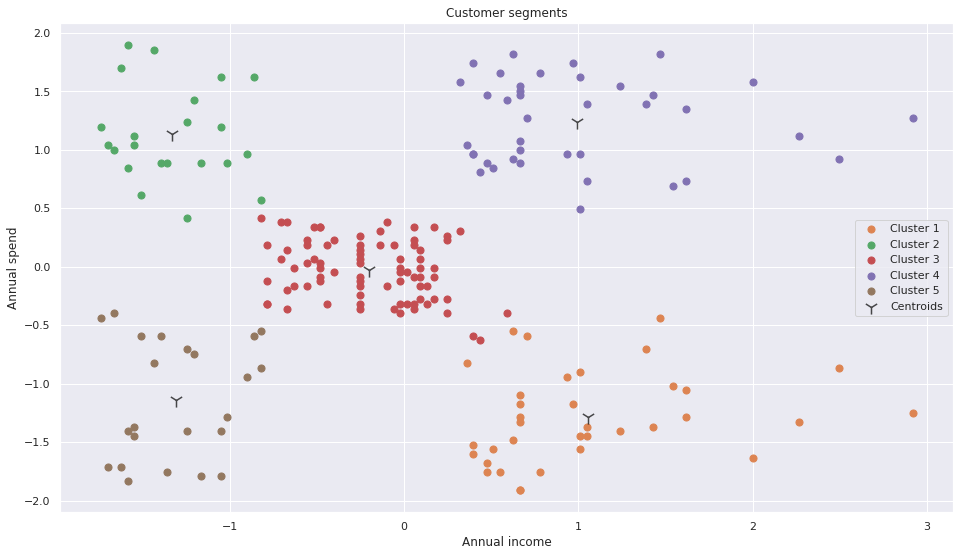

In [142]:
# Apply the K-Means Model to the Data
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = kmeans.fit_predict(income)

# Visualising Clusters for k=5
sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score_(1-100)', data=df_mall)
plt.scatter(income[cluster == 0, 0], income[cluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(income[cluster == 1, 0], income[cluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(income[cluster == 2, 0], income[cluster == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(income[cluster == 3, 0], income[cluster == 3, 1], s = 50, label = 'Cluster 4')
plt.scatter(income[cluster == 4, 0], income[cluster == 4, 1], s = 50, label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='1', alpha=0.7, label='Centroids', c='black')
plt.title('Customer segments')
plt.xlabel('Annual income')
plt.ylabel('Annual spend')
plt.legend()
plt.show()

Maka didapatkan output dari pemodelan tersebut adalah seperti scatter plot diatas, dimana tiap warna berbeda menunjukkan klaster yang berbeda, dengan centroids tiap klaster yang dilambangkan Y.

Setelah mendapatkan pemodelan, maka bisa langsung diimplementasikan ke data set yang kita miliki.

In [147]:
# Save= Result
# Add Cluster Information to the Raw Data
df_income['cluster'] = cluster
df_income

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,1
2,3,0,20,16,6,4
3,4,0,23,16,77,1
4,5,0,31,17,40,4
...,...,...,...,...,...,...
195,196,0,35,120,79,3
196,197,0,45,126,28,0
197,198,1,32,126,74,3
198,199,1,32,137,18,0


In [145]:
# Save= Result
df_income.to_csv('Mall_Customer.csv', index=False)